In [1]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from ProcessDB import ProcessDB
from PredictSVR import PredictSVR
from statsmodels.tsa.statespace.sarimax import SARIMAX




database_path = "/home/sachin/Downloads/RWO_0004_Ventilatoren_00.sqlite"

forecast_hour = '2021-05-27 12:00:00'
training_duration = 6

scaler = MinMaxScaler()

df = ProcessDB(database_path, forecast_hour, training_duration)

In [2]:
scaler = MinMaxScaler()

df.train['value'] = scaler.fit_transform(df.train)
df.test['value'] = scaler.transform(df.test)
df.train = df.train.diff()
HORIZON = 904

order = (4, 1, 1)
seasonal_order = (1, 1, 0, 24)

model = SARIMAX(endog=df.train, order=order)
results = model.fit()

print(results.summary())

/home/sachin/.local/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                21604
Model:               SARIMAX(4, 1, 1)   Log Likelihood               35547.471
Date:                Tue, 16 Aug 2022   AIC                         -71082.943
Time:                        09:29:19   BIC                         -71035.059
Sample:                    05-27-2021   HQIC                        -71067.335
                         - 05-27-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3832      0.003   -112.239      0.000      -0.390      -0.377
ar.L2         -0.3258      0.004    -75.623      0.000      -0.334      -0.317
ar.L3         -0.2677      0.004    -60.976      0.0

In [3]:
yhat = results.forecast(steps = HORIZON)


In [4]:
yhat = scaler.inverse_transform(yhat.values.reshape(-1,1))

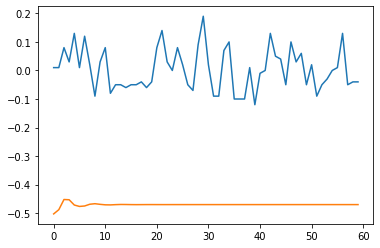

In [5]:
df.test['value'] = scaler.inverse_transform(df.test)

import matplotlib.pyplot as plt
plt.plot(df.test['value'].values[:60])
plt.plot(yhat[:60])
